In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
#from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np
import math

In [2]:
#provider0 = IBMQ.load_account()
#provider1 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [3]:
#backends = provider0.backends()
#backend = provider0.get_backend('ibmq_16_melbourne')

#print("The backend is " + backend.name())
simulator = Aer.get_backend('qasm_simulator')
pi = np.pi

In [16]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

# |0>+|3>+|6>
qc.u3(math.acos(math.sqrt(2/3))*2,0,0,q[2])
qc.cx(q[2],q[1])
qc.x(q[2])
qc.ch(q[2],q[0])
qc.ccx(q[2],q[0],q[1])
qc.x(q[2])

#qc.measure(q[0], c[0])
#qc.measure(q[1], c[1])
#qc.measure(q[2], c[2])





# IBMQ16

In [5]:
#job_exp = execute(qc, backend=backend, shots=8192)
#counts = job_exp.result().get_counts(qc)

In [6]:
#print(counts)

In [7]:
#plot_histogram(counts)

# Simulator

In [8]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [9]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'0000': 2703, '0011': 2717, '0110': 2772}


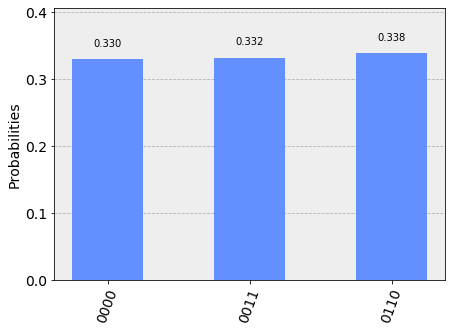

In [10]:
plot_histogram(counts_sim)

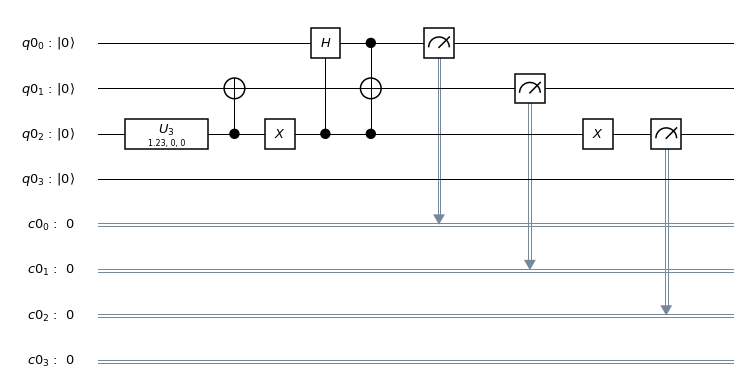

In [11]:
qc.draw(output='mpl')

In [17]:
#QFT
#biggest qubit stand on top

qc.h(q[0])

qc.cu1(pi/2,q[1] ,q[0])
qc.h(q[1])

qc.cu1(pi/4,q[2] ,q[0])
qc.cu1(pi/2,q[2] ,q[1])
qc.h(q[2])

qc.swap(q[0],q[2])


qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

In [22]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [23]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'0011': 339, '0001': 351, '0110': 1956, '0111': 55, '0101': 1986, '0100': 48, '0010': 370, '0000': 3087}


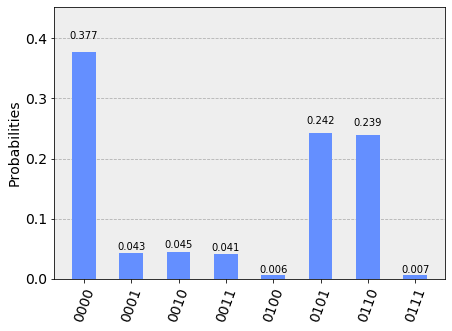

In [24]:
plot_histogram(counts_sim)

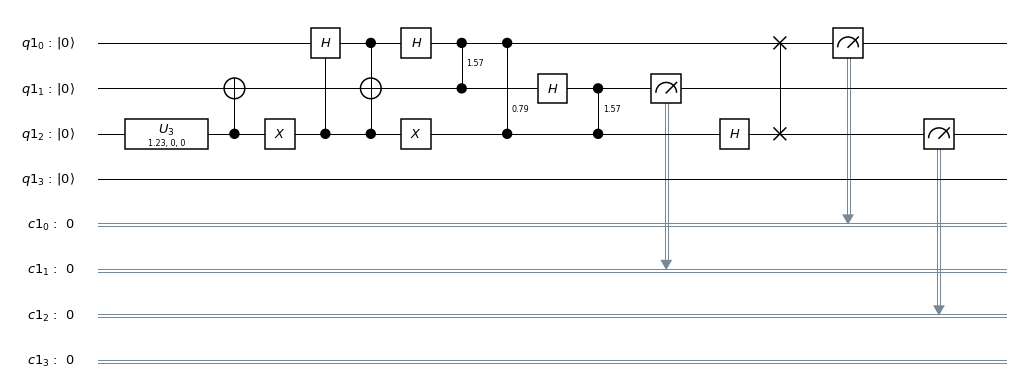

In [25]:
qc.draw(output='mpl')